# Lecture 4.2 - Plotting with Matplotlib

# Summary

### Programming 


- Plotting a simple function
- The Current Axes object: an alternative approach
- Multiple plots in one figure
- Multiple individual subplots in one figure
- Linear or Logarithmic axes? 
- Generating a 2 dimensional coordinate grid
- Plotting a 3 dimensional surface using `plot_surface`
- Pixellated and Contour plots using `pcolor` and `contourf`






## Overview

You can view this Lecture is written in "cookbook" style with the main objective of getting you started with **matplotlib** and giving you an overview of how it works. Accordingly,  we  will introduce a number of examples and explain the essential ideas and techniques used. However,  we will not have time to go through all of the details and programming concepts implicit to these examples.  

**A bit of advice.** Using the library **matplotlib** is straight-forward. However knowing all the different ways of doing things with this library is not. So be ready to use the web when you have a question. (I certainly do this all the time while using **matplotlib** or **python** in general).  

- You can  consult directly  the official  **matplotlib** web site: <a href="https://matplotlib.org/index.html">https://matplotlib.org/index.html</a> 
- Otherwise search the web with an appropriately worded question. 

There are also a number of books on scientific computing in python in the library that you can consult. For example 

- *A student's Guide to Python for Physical Modeling* by Jesse M. Kinder and Philip Nelson available via the library page: <a href="https://bris.on.worldcat.org/oclc/908083673">https://bris.on.worldcat.org/oclc/908083673</a> 

contains a fairly in-depth discussion of **matplotlib** particularly in the 3rd Chapter. (This is the 2015 version. The 2018 version is also available $-$ but only as a single physical copy). 

The python `help` function can also be very useful. Its use is illustrated below. 


<div class="alert alert-warning">

## For enthusiasts
<strong>Cells of this colour (or associated code cells) contain material that is entirely optional $-$ it is not core material for the course and you do not need to study it. (But you might find it useful in any future re-reading of the course.)
    </strong>

    
The optional material is in the Appendix which covers the following.
- Contour and surface plots using `imshow`
- Plotting vector fields using `quiver`
    </div>

## Essential imports

We import the `numpy` and `matplotlib.pyplot` libraries under the aliases `np` and `plt` respectively. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

We can look at the documentation of `matplotlib.pyplot` using the `help` function. For example, we can inspect  the documentation of individual functions. 

In [2]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure.
    
    Parameters
    ----------
    num : integer or string, optional, default: None
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : (float, float), optional, default: None
        width, height in inches. If not provided, defaults to
        :rc:`figure.figsize` = ``[6.4, 4.8]``.
    
    dpi : integer, optional, default: None
   

## A truly minimal example

Let's plot a graph joining the points $(0,0)$, $(1,1)$, $(2,4)$, $(3,9)$. 

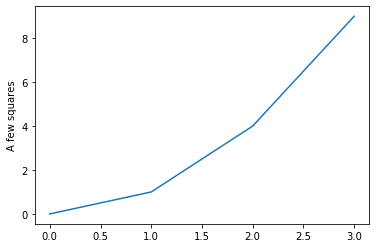

In [3]:
plt.figure()  
plt.plot([0,1,4,9])
plt.ylabel("A few squares")
plt.show()

Notice how python extrapolates the $x$ coordinates (corresponding to the indices of the given list). More sensibly (in general) we would use a `numpy` array instead of a list for the $y$ coordinates and specify the $x$ coordinates. Let's add a title and label for the axes and plot the points with small discs. 

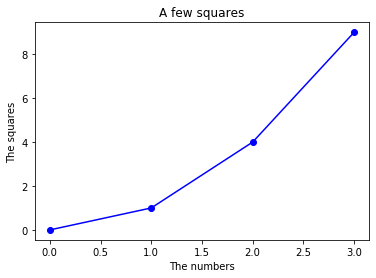

In [4]:
plt.figure()
x_values = np.array([0,1,2,3])
y_values = np.array([0,1,4,9])
# Below 'b-o' specifies a blue (the 'b' part) solid line (the '-' part) and discs at the points (the 'o' part)
# Simpler versions could be 'b' or '-o' or '-' (you should try these)
plt.plot(x_values, y_values,'b-o')  
# This is shorthand for the following syntax (comment the above line and uncomment the line below to try this)
#plt.plot(x_values, y_values, color='blue', linestyle='-', marker='o')
plt.ylabel("The squares")
plt.xlabel("The numbers")
plt.title("A few squares")
plt.show()

## Plotting a simple function. 

As a further simple example let's plot the function $f(x) = x^3 - 3x^2$ over the closed interval $[-2,2]$. 

In [ ]:
help(plt.plot)

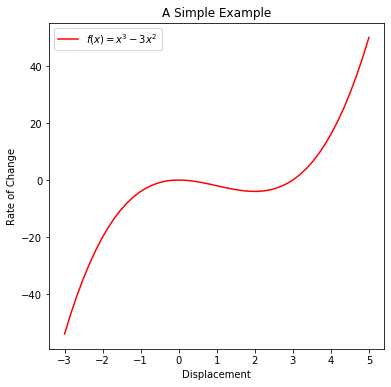

In [6]:
x_min, x_max = -3, 5     # Nice way of assigning values to two (or more if you want) variables 
num_points = 50          # Need enough points for the curve to appear smooth
x_values = np.linspace(x_min,x_max,num_points)  # x_values is a numpy array.
y_values = x_values**3 - 3*(x_values**2)        # Apply f(x) = x^3 -3x^2 to get numpy array of y_values 
                            

plt.figure(figsize=(6,6))                                   # We specify the size of the figure
plt.plot(x_values,y_values,'r',label='$f(x) = x^3- 3x^2$')  # 'r' is for red curve, label is for the legend. 
                                                            #  LaTeX can be used in the label as here.  

plt.xlabel("Displacement")
plt.ylabel("Rate of Change")
plt.title("A Simple Example")
plt.legend()

plt.show()

## The Current Axes object: an alternative approach

When we implement the command 
```
plt.plot()
```
(with appropriate arguments) both an  object (i.e. instance)  of the class  `matplotlib.figure.Figure` is created, as also an object of the class `matplotlib.axes.Axes`. This means that we have a  current Figure object  that we can retrieve with  the command `plt.gcf()` and a current Axes object that we can retrieve with the command `plt.gca()`. Using the methods defined in each of the respective classes (remember that methods are functions belonging to a class that can manipulate and modify the objects belonging to the class) we can control and modify the attributes of our plots. 

**Note 1.**  Up to now we have defined/modified our plots by simply using functions such as `title` that belong to the `matplotlib.pyplot` module. For simplicity we will often proceed in this manner when the appropriate such functions are available. 

**Note 2.** We have implemented the command `plt.figure()` in our examples above.  In this way we explicitly create current Figure and Axes objects. This is not necessary however: when we issue the command `plt.plot()` (with appropriate arguments) both a current Figure and Axes object are created (as mentioned above). We can then simply name these objects -  i.e. assign them to variables. For example, by implementing  `fig = plt.gcf()` and `ax = plt.gca()` we name the current Figure object as `fig` and  the current Axes object as `ax`. Note that we could have implemented `fig = plt.figure()` in which case we would already have assigned our current Figure object to the variable `fig` (and so the command `fig = plt.gcf()` would not be necessary).  

Below is another version of our "Simple Example" using this alternative approach. Notice also that in our 3D example below being able to modify the  current Axes object in a similar way  becomes very useful. 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

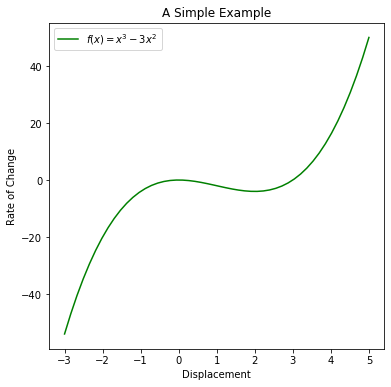

In [8]:
x_min, x_max = -3, 5      # Nice way of assigning values to two (or more if you want) variables 
num_points = 50           # Need enough points for the curve to appear smooth
x_values = np.linspace(x_min,x_max,num_points)  # x_values is a numpy array.
y_values = x_values**3 - 3*(x_values**2)        # Apply f(x) = x^3 -3x^2 to get numpy array of y_values 
                            
plt.plot(x_values,y_values)                # Plot the curve, this time colour and label are specified below 

fig = plt.gcf()                            # fig is now the current Figure object
fig.set_size_inches(6,6)                   # We specify the size of the figure

ax = plt.gca()                             # ax is now the current Axes object
ax.set_xlabel("Displacement")             
ax.set_ylabel("Rate of Change")

lines = ax.get_lines()                     # lines is now an array containing the lines plotted (only one here)
lines[0].set_label("$f(x) = x^3- 3x^2$")   # lines[0] is the single plotted line here 
lines[0].set_color('green')                # This time we set the colour to green
#lines[0].set_linewidth(3)                 # Uncomment this line to see the difference
#lines[0].set_linestyle('-.')
ax.set_title("A Simple Example")
ax.legend()

plt.show()

## Multiple plots in one Figure

Let's now plot the functions $f(x) = \cos x$, $g(x) = 1/2 \sin 2x$ and $h(x) = f(x) + g(x)$ on the closed interval $[0,4\pi]$ in the same figure. We also save the plot as an image file. 

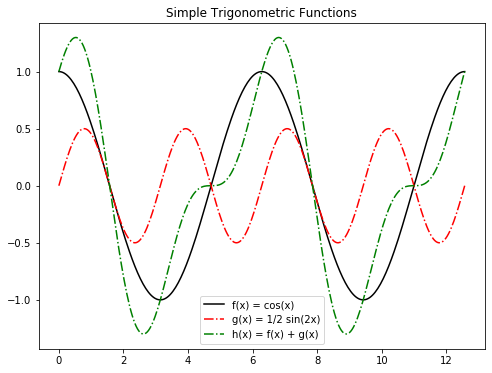

In [9]:
# 300 points between 0 and 4 pi (inclusive) , for the x values
x_values = np.linspace(0,4*np.pi,300)

# We now code the output of our functions into 3 numpy arrauys.  
# Remember that you can can add and multiply numpy arrays
y_values0 = np.cos(x_values)
y_values1 = 0.5*np.sin(2*x_values)
y_values2 = y_values0 + y_values1

# Create a new figure
plt.figure(figsize=(8,6))

# The plot. Note linestyle color and label arguments (or shorthand e.g)
# Again we use LaTex in the labels, e.g. $g(x) = 1/2 sin(2x)$
plt.plot(x_values, y_values0, linestyle='-', color='k', label='f(x) = cos(x)')
plt.plot(x_values, y_values1, linestyle='-.', color='r', label='g(x) = 1/2 sin(2x)')
plt.plot(x_values, y_values2, linestyle='-.', color='g', label='h(x) = f(x) + g(x)')

# Alternative shorthand versions possible. e.g. last plot
#plt.plot(x_values, y_values2, 'g-.', label='h(x) = f(x) + g(x)') 

plt.title('Simple Trigonometric Functions')
# Include a legend
plt.legend()

# We can export a proper high resolution png version of this graph as follows:
# This is ideal for inclusion in a latex report
plt.savefig('plot_example.png')
plt.show()

## Multiple individual subplots in one  Figure

We can also create several sub-figures using the `subplot()` function. For example if wanted to create $6$ sub-plots 
arranged in a $3 \times 2$ grid (i.e. 3 rows and 2 columns) then 
```python
plt.subplot(3,2,1)
```
would create the first sub-plot. The sub-plots are counted from left to right along the rows: subplots 1 and 2 make up the first row, subplots 3 and 4 make up the second row and subplots 5 and 6 make up the third row. Hence 
```python 
plt.subplot(3,2,4) 
``` 
would create the sub-plot on the right in the second row. Accordingly in general, when we are setting up  a grid of sub-plots with $r$ many rows and $c$ many columns, we create sub-plot number $n$ (with $1 \le n \le r \times c$) 
by implementing
```python
plt.subplot(r,c,n)
```
This sub-plot will then appear in the $n$th position counting left to right through the rows  and downwards through the columns (so the position count "zigzags" downwards). 

Let's try this out with a grid of four plots of functions $f(t)$, $g(t)$, $h(t)$ and $k(t)$ representing  oscillatory motion (as a function of time $t$)  with different rates of decay. 

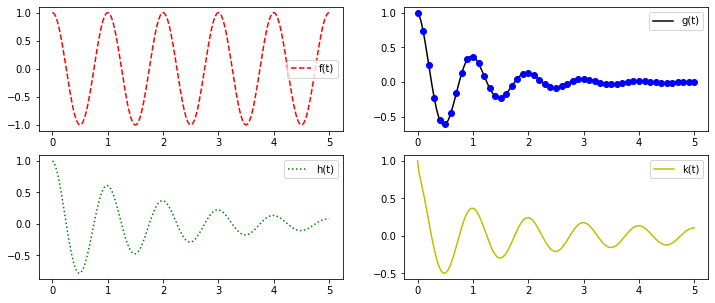

In [10]:
def f(t):
    return np.cos(2*np.pi*t)

def g(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

def h(t): 
    return np.exp(-t/2) * np.cos(2*np.pi*t)

def k(t): 
    return np.exp(-(t**0.5)) * np.cos(2*np.pi*t)

# We can use  arange to construct a numpy array of values of t (where t is time)
# The syntax is: np.arange(x_min,x_max,step_size)
# Reminder: this is an alternative to np.linspace
t_values = np.arange(0.0, 5.02, 0.02)

# We also use more widely spaced t values in our second sub-plot
tt_values = np.arange(0.0,5.1,0.1)

# Create a new figure
plt.figure(figsize=(12,5))

# Create subplots.  
# Remember the syntax plt.subplot(num_rows, num_cols, current_num)

# First subplot: upper left 
plt.subplot(221)
# The line style here: red dashes
plt.plot(t_values, f(t_values), 'r--', label='f(t)') 
plt.legend()

# Second subplot: upper right
plt.subplot(222)
# Two plots here
# The first is a black curve. Here 'k' is for black - default solid line.
plt.plot(t_values, g(t_values), 'k', label='g(t)' )
# The second is blue discs at points whose t-coordinate differs by 0.1.
# Here 'bo' is for 'blue o/disc symbols'
plt.plot(tt_values, g(tt_values), 'bo' )
plt.legend()

# The following two lines have the same effect as the lines above except that the label g(x)
# appears twice in the legend (with the black line and with the blue discs)
# plt.plot(t_values, g(t_values), 'k',  tt_values, g(tt_values),'bo', label='g(t)')
# plt.legend()

# Third subplot: lower left
plt.subplot(223)
# Line sytle here: green dots 
plt.plot(t_values, h(t_values), 'g:', label='h(t)')
plt.legend()

# Fourth subplot: lower right
plt.subplot(224)
# Line style here: yellow solid line
plt.plot(t_values, k(t_values), 'y-' ,label='k(t)' )
plt.legend()

plt.show()

## Linear or Logarithmic axes? 

It can be very useful to scale one or other (or both) of the axes. For example we may want the y-axis to be logarithmic instead of linear. In the following example we explore how to do this on a figure with four 
supplots, the first three having different axis scalings and the fourth repeating the axis scaling of the third subplot but over restricted axis intervals. 

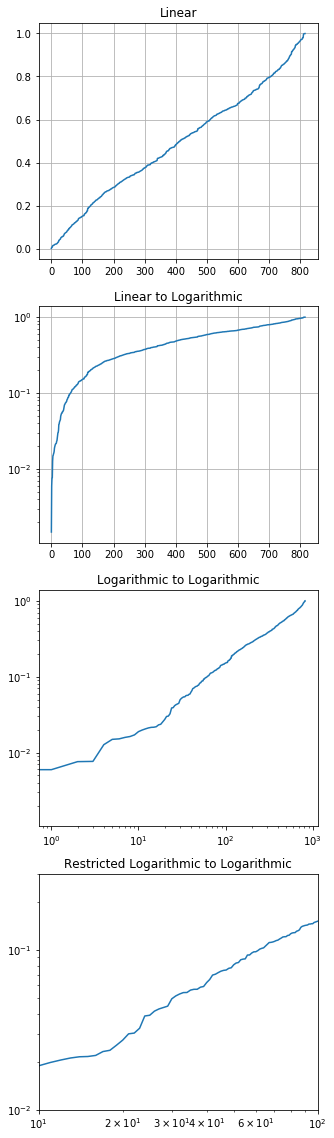

In [11]:
# We firstly generate a 1 dimensional array with 1000 random reals according to 
# a normal distribution with mean 0.5 and standard deviation 0.4. 
# We fix our random state (using a seed) to reproduce the same array each time. 
np.random.seed(5213401)
r_values = np.random.normal(loc=0.5, scale=0.4, size=(1000,))
# For our y values we  only keep the numbers lying in the open interval [0,1)
y_values = np.array([r for r in r_values if r >= 0 and r < 1])
# Which we then sort
y_values.sort()
# We now generate some x values for the sorted array of y values
x_values = np.arange(len(y_values))

# We plot with various axes scales
plt.figure(figsize=(5,20))

# Linear plot (for both axes)
plt.subplot(411)
plt.plot(x_values, y_values)
plt.title('Linear')
# Note the use of a grid for the first two plots
plt.grid(True)

# Logarithmic plot on the y axis
plt.subplot(412)
plt.semilogy(x_values, y_values)
plt.title('Linear to Logarithmic')
plt.grid(True)

# Logarithmic plot on both axes
plt.subplot(413)
plt.loglog(x_values, y_values)
plt.title('Logarithmic to Logarithmic')


# Logarithmic plot on both axes
# The same but restricting both the x interval and y interal displayed 
plt.subplot(414)
plt.loglog(x_values, y_values)
plt.title('Restricted Logarithmic to Logarithmic')
plt.ylim(1/10**2,0.3)
plt.xlim(10,100)

plt.show()


## Generating a 2 dimensional coordinate grid

To plot a 3 dimensional curve - corresponding to a function $f$ whose inputs are real number pairs $(x,y)$ - we will somehow need to represent our two dimensional data (i.e. over the $xy$-plane) in a suitable way for processing our implementation of the function $f$. This is done by arranging the $x$ and $y$ coordinates used into matrices $(x_{ij})$ and $(y_{ij})$ such that the pair $(x_{ij},y_{ij})$ corresponds to the point with index $ij$ used as input for $f$. For example suppose that we want to plot the function $f(x,y) = 2(x+y)$ on $25$ evenly spaced points in the unit square $[0,1] \times [0,1]$. Then, to generate the data needed for plotting we would proceed as in the following cell. 

In [12]:
# x_vector and y_vector are both of the form [0,0.25,0.5,0.75,1.0] and 
x_vector = np.linspace(0,1,5)
y_vector = np.linspace(0,1,5)

print("\nx_vector:", x_vector)
print("y_vector:", y_vector)

# We now create 5x5 matrices for the x coordinates and the y coordinates
# of the 25 pairs that are input to our function f
x_matrix, y_matrix = np.meshgrid(x_vector,y_vector)
f_matrix = 2 * (x_matrix + y_matrix)

print("\nx_matrix:\n", x_matrix)
print("y_matrix:\n",y_matrix)
print("f_matrix:\n",f_matrix)


x_vector: [0.   0.25 0.5  0.75 1.  ]
y_vector: [0.   0.25 0.5  0.75 1.  ]

x_matrix:
 [[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]
y_matrix:
 [[0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25]
 [0.5  0.5  0.5  0.5  0.5 ]
 [0.75 0.75 0.75 0.75 0.75]
 [1.   1.   1.   1.   1.  ]]
f_matrix:
 [[0.  0.5 1.  1.5 2. ]
 [0.5 1.  1.5 2.  2.5]
 [1.  1.5 2.  2.5 3. ]
 [1.5 2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5 4. ]]


You can now easily check that the `f_matrix` has been populated component-wise by  the values of $f$ with inputs $(x,y)$ where $x$ and $y$ are extracted from the corresponding components in `x_matrix` and `y_matrix`. 

**Note.** By definition  `x_matrix` and `y_matrix` have the same dimensions and together represent a grid of coordinates of the plane with these dimensions. Note that the number of rows of this grid (and so of the matrices) is given by the number of $y$-coordinates used (i.e. `len(y_vector)` in the above example) as each row of `y_matrix`  is populated by a unique $y$ coordinate. Likewise the number of columns is given by the number of $x$ coordinates used (i.e. `len(x_vector)` in the above example) as each column of `x_matrix` is populated by a unique $x$ coordinate. (Of course in the above example the number of rows and columns were the same - but this is a special case.) 

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

## Plotting a 3 dimensional surface using `plot_surface`

With the above bit of extra technology in hand we can plunge into some $3$ dimensional plotting: we will plot the function $z(x,y) = \sin (\sqrt{x^2 + y^2})$ using the `plot_surface` method defined in the `mpl_toolkits.mplot3d.Axes3D` class (which we need to import). 

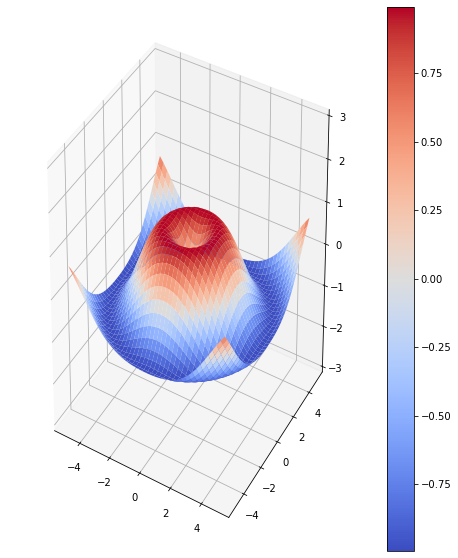

In [14]:
# Import three-dimensional axes
from mpl_toolkits.mplot3d import Axes3D 

# Generate the data: starting with one dimension arrays
x_vector = np.arange(-5, 5.25, 0.25)
y_vector = np.arange(-5, 5.25, 0.25)

# Transform these into matrices representing a grid for the plot
x_matrix, y_matrix = np.meshgrid(x_vector, y_vector)

# Now implement the function z(x,y) = sin(sqrt(x^2+y^2)) - in two steps for clarity
u_matrix  = np.sqrt(x_matrix**2 + y_matrix**2)
z_matrix = np.sin(u_matrix)


# Create a figure 8 inches long by 10 inches tall.
plt.figure(figsize=(8,10))
# Create a 3 dimensional axes object and call it ax
ax = plt.axes(projection='3d')
# Alternatively use  plt.axes(projection='3d')  followed by  ax = plt.gca()

# Plot the surface using the plot_surface method from the Axes3D class
# Here we use the 'coolwarm' colormap. 
surf = ax.plot_surface(x_matrix, y_matrix, z_matrix, cmap='coolwarm')

# Customize the z axis limits: note use of 3DAxes method set_zlim
ax.set_zlim(-3.01, 3.01)

# Add a color bar which maps values to colors.
plt.colorbar(surf)

plt.show()

### Alternative Approach

As often with `matplotlib` there are various ways of doing the same thing. For example, notice that in the above we explicitly created an instance/object of the  `matplotlib.figure.Figure` class of dimensions $8 \times 10$ inches with the command `plt.figure(figsize=(8,10))`. We also created a 3D  instance/object of the `mpl_toolkits.mplot3d.Axes3D` class and assigned it to the variable `ax` using the command `ax = plt.axes(projection='3d')`. (We call these the *current figure*  and *current axes* objects.)  Now, using the same data as above we can also name the current figure object (when we create it)  using the command `fig = plt.figure(figsize=(8,10))` and then use methods in the `matplotlib.figure.Figure` class to modify this (current) figure object. For example we use the command `fig.colorbar(surf)` to add a colour bar. (Compared to `plt.colorbar(surf)` above.)   

**Note.** We will also use a different colour map, chosen from  <a href="https://matplotlib.org/stable/gallery/color/colormap_reference.html">https://matplotlib.org/stable/gallery/color/colormap_reference.html</a> . 

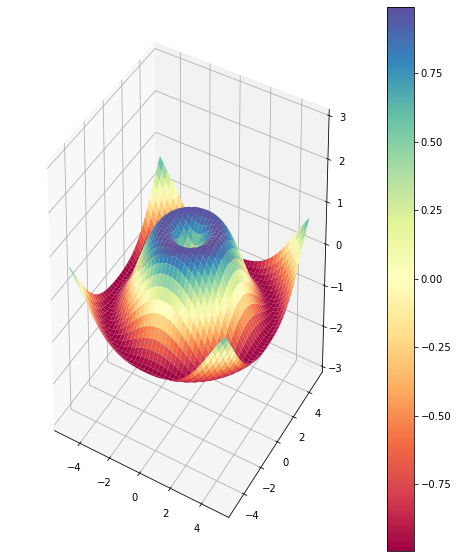

In [15]:
# Import three-dimensional axes
from mpl_toolkits.mplot3d import Axes3D 

# The data: using x_matrix, y_matrix, z_matrix from above. 

# Create a figure 8 inches long by 10 inches tall
# fig is assigned to the Figure object created. 
fig = plt.figure(figsize=(8,10))
# Create a 3 dimensional axes object and call it ax
ax = plt.axes(projection='3d')

# Plot the surface using the plot_surface method from the Axes3D class 
# ("called by" the Axes3D object ax). Here we use the 'Spectral' colormap. 
surf = ax.plot_surface(x_matrix, y_matrix, z_matrix, cmap='Spectral')

# Customize the z axis limits: note use of Axes3D method set_zlim
ax.set_zlim(-3.01, 3.01)

# Add a color bar, this time using the colorbar method from the Figure class
fig.colorbar(surf)

plt.show()

## Pixellated and Contour plots using `pcolor` and `contourf`

We can also plot $3$ dimensional surfaces using pixellated data plotting and contour plotting. For the former we use the pyplot function  `pcolor` and for the latter we use the `contourf` method (also defined in the `matplotlib.axes.Axes` class). As an example we will use these two approaches to plot the function 
$z(x,y) = (\sin(x))^{10} + \cos(10+xy)\cos(x)$.  

Since we are using the same function in both cases, we begin by generating the relevant data. 

In [16]:
# We define the number of equally spaced x and y coordinates that we use. 
# Increase these to increase the resolution (401 points -> 400 intervals/spaces)
num_xpts, num_ypts = 401, 401

# Generate the data: starting with one dimension arrays
x_vector = np.linspace(1, 5, num_xpts)
y_vector = np.linspace(1, 5, num_ypts)

# Transform these into matrices representing a grid for the plot
x_matrix, y_matrix = np.meshgrid(x_vector, y_vector)

# Define the grid/matrix for our function 
z_matrix = np.sin(x_matrix)**10 + np.cos(10 + x_matrix*y_matrix) * np.cos(x_matrix)

# We will need the minimum and maximum values of z for setting the colour map. (See Remark 1.)
z_MIN = z_matrix.min()
z_MAX = z_matrix.max()

# Let's these values and those of the grid matrices 
print("z_MIN = {:.3f} and z_MAX = {:.3f}\n".format(z_MIN,z_MAX))
print("The x matrix:\n", x_matrix)
print("The y matrix:\n", y_matrix)
print("The z matrix:\n", z_matrix)

z_MIN = -1.000 and z_MAX = 1.051

The x matrix:
 [[1.   1.01 1.02 ... 4.98 4.99 5.  ]
 [1.   1.01 1.02 ... 4.98 4.99 5.  ]
 [1.   1.01 1.02 ... 4.98 4.99 5.  ]
 ...
 [1.   1.01 1.02 ... 4.98 4.99 5.  ]
 [1.   1.01 1.02 ... 4.98 4.99 5.  ]
 [1.   1.01 1.02 ... 4.98 4.99 5.  ]]
The y matrix:
 [[1.   1.   1.   ... 1.   1.   1.  ]
 [1.01 1.01 1.01 ... 1.01 1.01 1.01]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 ...
 [4.98 4.98 4.98 ... 4.98 4.98 4.98]
 [4.99 4.99 4.99 ... 4.99 4.99 4.99]
 [5.   5.   5.   ... 5.   5.   5.  ]]
The z matrix:
 [[ 0.18037951  0.19733048  0.21459411 ...  0.49857513  0.47038408
   0.44192559]
 [ 0.18578228  0.20270124  0.21993009 ...  0.4900618   0.46164825
   0.43297564]
 [ 0.19118426  0.20807066  0.22526419 ...  0.48205905  0.45344802
   0.42458669]
 ...
 [-0.22536417 -0.22451567 -0.22158639 ...  0.43931198  0.41438653
   0.39023198]
 [-0.22893885 -0.22786455 -0.2247023  ...  0.44279591  0.41865718
   0.39532695]
 [-0.23247283 -0.23117085 -0.22777383 ...  0.44690761  

### Pixellated plot using `pcolor`

Using the grid data matrices  `x_matrix`, `y_matrix`, `z_matrix` from above we  can now plot the function $z(x,y)$ on domain $[1,5]\times[1,5]$ using the pyplot function `pcolor`.  



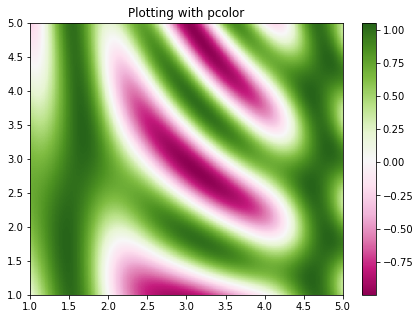

In [17]:
# Create a figure of size 8x6 inches
plt.figure(figsize=(7,5))
# Plot the surface z(x,y) using the grid data generated above and colour map PiYG 
# See the Remark below concerning parameters vmin and vmax
plt.pcolor(x_matrix, y_matrix, z_matrix, cmap='PiYG', vmin=z_MIN, vmax=z_MAX)
# Install a colour bar to display the colour mapping
plt.colorbar()
plt.title('Plotting with pcolor')
plt.show()

**Remark 1.** The values of  `vmin` and `vmax` are in fact set by default to the minimum and maximum $z$ coordinate values over the region plotted. So in our example  we did not need to explicitly assign values to these parameters. However it is good practice to do this. For example, if you now "zoom in" on a region of the plane without explicitly assigning the same values (as for the original larger plot) to `vmin` and `vmax` then, if the minimum and maximum $z$ coordinate values are different to the original data set (from the original larger plot) then the colour coding of the surface will be different and so cannot be directly compared to that of the larger plot. On the other hand if you do explictly assign the same values to `vmin` and `vmax` then, however much you zoom in to a region of the original larger plot the result will always be a higher definion version of the original.  

### Contour  plot using `contourf`

Using the grid data matrices `x_matrix`, `y_matrix`, `z_matrix` from above we also now plot the function $z(x,y)$ on domain $[1,5]\times[1,5]$ using the pyplot function `contourf`.  



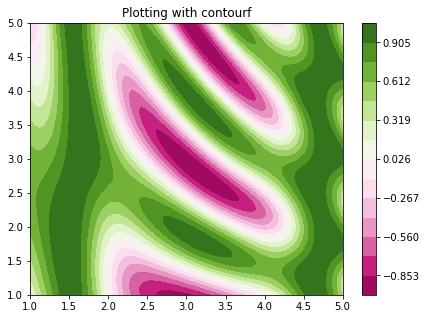

In [18]:
# Create a figure of size 8x6 inches
plt.figure(figsize=(7,5))
# The function contourf fills contour lines: and these are *interpolated*
# We need to tell it which contour levels to use 
cr_levels = np.linspace(z_MIN,z_MAX,15)
# Plot the surface z(x,y) using the grid data generated above, and colour map PiYG
plt.contourf(x_matrix, y_matrix, z_matrix, levels=cr_levels, cmap='PiYG', vmin=z_MIN, vmax=z_MAX)
# Install a colour bar to display the colour mapping
plt.colorbar()
plt.title('Plotting with contourf')
plt.show()

**Remark 2.** The observations detailed in Remark 1 $-$ i.e. concerning explicit assignment of `vmin` and `vmax` $-$ also apply to the present example, for the same reasons. 

<div class="alert alert-warning">

#  Appendix - further plotting functions
    
**For enthusiasts - the material in this Appendix is entirely optional - you do not need to study it**
</div>

<div class="alert alert-warning">

## Contour and surface plots using `imshow`

The `pyplot` function `imshow`, although originally designed for displaying images, can be used as an alternative method for plotting $3$ dimensional surfaces. Here we plot the function $z(x,y) = (z_1(x,y) - z_2(x,y))^2$ where 
$z_1$ and $z_2$ are each (bivariate) normal distribution functions (defined explicitly in the cell below). 
</div>

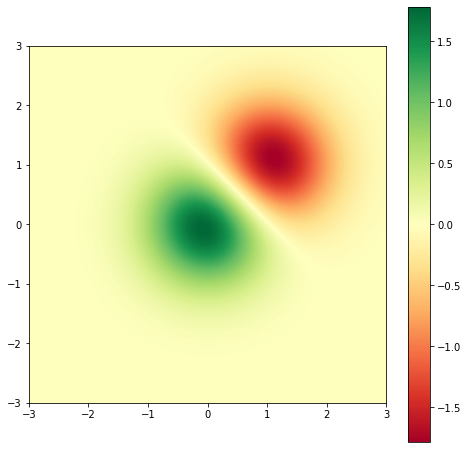

In [19]:
# The spacing between points is delta
delta = 0.025
# Generating x and y values between -3 and 3 with spacing delta
x_values = np.arange(-3.0, 3.0, delta)
y_values = np.arange(-3.0, 3.0, delta)

# We need matrices representing a grid for computing our z values
x_matrix, y_matrix = np.meshgrid(x_values, y_values)

# Our function z is defined in terms of two  (bivariate) normal distribution functions
z1_matrix = np.exp(-x_matrix**2 - y_matrix**2)
z2_matrix = np.exp(-(x_matrix - 1)**2 - (y_matrix - 1)**2)
# And we now obtain the values for our function z 
z_matrix = 2 * (z1_matrix - z2_matrix) 

# Let's create the figure
plt.figure(figsize=(8,8))

# The function imshow  only takes the matrix for z (and not the x and y matrices) 
# as it assumes an even grid
plt.imshow(z_matrix, interpolation='bilinear', cmap='RdYlGn', origin='lower', 
           extent=[-3, 3, -3, 3], vmin=-abs(z_matrix).max(), vmax=abs(z_matrix).max())

plt.colorbar()
plt.show()

<div class="alert alert-warning">

## Plotting vector fields using `quiver`. 

The `quiver` function from the `pyplot` module allows us to draw vector fields as arrows. Here is an easy, randomly generated example. 
</div> 

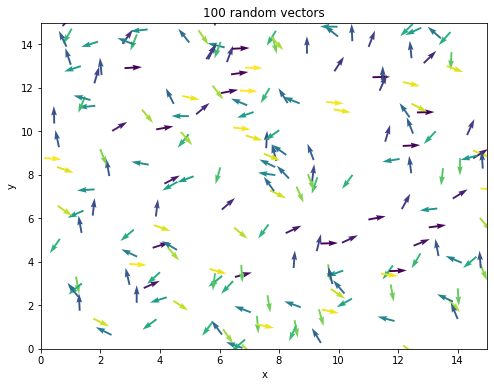

In [20]:
# Start by generating 200 random points
num_points = 200 
# Uncomment the next line if you want to reproduce the same plot each time (number 741328 chosen arbitrarily)
# np.random.seed(741328)
x_values = 15 * np.random.rand(num_points,)
y_values = 15 * np.random.rand(num_points,)
# And 100 random angles associated with them
theta_values = 2 * np.pi * np.random.rand(num_points,)

# We will then plot an arrow pointing along that direction for each point
# with the arrow colored according to that direction

plt.figure(figsize=(8,6))

# Syntax for quiver: quiver(x,y,arrowx, arrowy, arrowcolor)
plt.quiver(x_values,y_values, np.cos(theta_values),np.sin(theta_values),theta_values)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,15)
plt.ylim(0,15)
plt.title('100 random vectors')

plt.show()